In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import warnings

In [27]:
warnings.filterwarnings('ignore')

In [8]:
prima_df = pd.read_csv("diabetes.csv")

In [10]:
prima_df.columns = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']

In [11]:
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [13]:
sc=StandardScaler()
sc.fit_transform(X)

c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
base_nb = GaussianNB()
abcl_nb = AdaBoostClassifier(base_estimator=base_nb,n_estimators=50,random_state=2)

In [19]:
base_LR = LogisticRegression()
abcl_LR = AdaBoostClassifier(base_estimator=base_LR,n_estimators=50,random_state=2)

In [29]:
base_rf = RandomForestClassifier(n_estimators=31,random_state=2)

In [23]:
rf_model= AdaBoostClassifier(base_estimator=base_rf,n_estimators=50,random_state=2)

In [20]:
abcl_dt = AdaBoostClassifier(n_estimators=50,random_state=2)

In [30]:
models = []
models.append(('Base_NB',base_nb))
models.append(('Boosted_NB',abcl_nb))
models.append(('LR',base_LR))
models.append(('Bagged_LR',abcl_LR))
models.append(('Boosted_DT',abcl_dt))
models.append(('Base_RF',base_rf))
models.append(('Boosted_RF',rf_model))

Base_NB: 0.410408 (0.001318)
Boosted_NB: 0.573263 (0.009595)
LR: 0.473394 (0.000123)
Bagged_LR: 0.580494 (0.000920)
Boosted_DT: 0.361396 (0.001694)
Base_RF: 0.385184 (0.003720)
Boosted_RF: 0.424443 (0.001602)


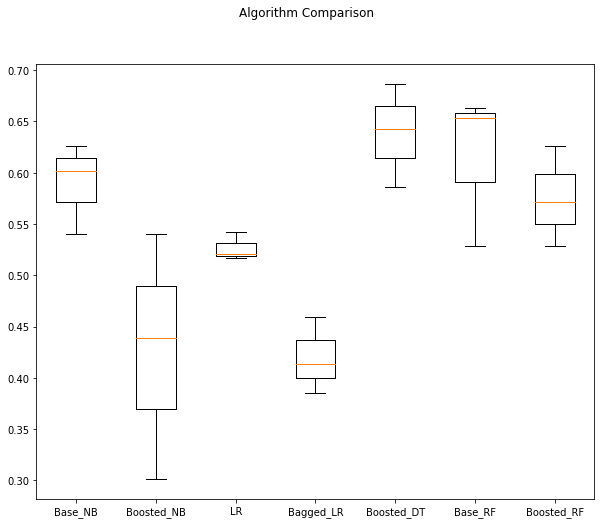

In [32]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, 
                                                 scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(1-cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Boosted DT is the best for less Bias Error 